Life cycle of Machine learning Project

1.Understanding the Problem Statement

2.Data Collection

3.Data Checks to perform

4.Exploratory data analysis

5.Data Pre-Processing

6.Model Training

7.Choose best model

Importing the Libraries :

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

    Data Collection : 

    Collected data from IMB (GITHUB)

    https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv

In [19]:
# Load the data set
data = pd.read_csv(r"D:\customer\customer_churn\Notebook\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [20]:
data.head() #checking the 5 rows of the data from head

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data.tail() #checking the 5 rows of the data from tail

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [22]:
data.shape # checking the total shape of the data

(7043, 21)

In [23]:
data.columns # checking the all columns name

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
data.info() # checking the info and type of all columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# checking the object columns and their unique values:

for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print('-'*30)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------------------------------
gender
['Female' 'Male']
------------------------------
Partner
['Yes' 'No']
------------------------------
Dependents
['No' 'Yes']
------------------------------
PhoneService
['No' 'Yes']
------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
------------------------------
DeviceProtection
['No' 'Yes' 'No internet service']
------------------------------
TechSupport
['No' 'Yes' 'No internet service']
------------------------------
StreamingTV
['No' 'Yes' 'No internet service']
------------------------------
StreamingMovies
['No' 'Yes' 'No internet service']
------------------------------
Contract
['Month-to-m

In [17]:
# chcking the missing values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Exploratry Data Analysis :

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

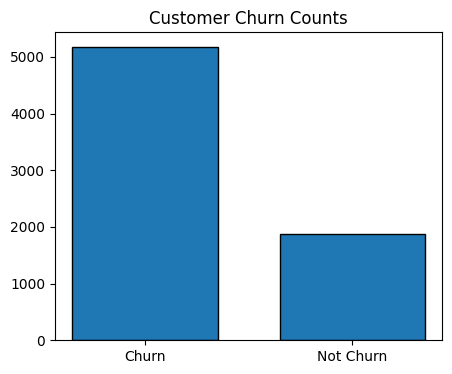

In [29]:
churn_perc = data['Churn'].value_counts(normalize=True) # it will give precenatge
print(churn_perc)

plt.figure(figsize=(5,4))
plt.title("Customer Churn Counts")
plt.bar(['Not Churn','Churn'],data['Churn'].value_counts(),edgecolor='k',width=0.7)

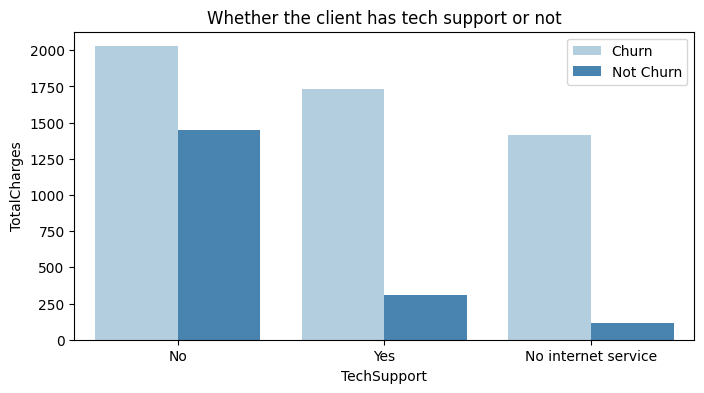

In [36]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='TechSupport',hue='Churn',data=data,palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Whether the client has tech support or not")
plt.xlabel('TechSupport')
plt.ylabel('TotalCharges')
plt.legend(['Not Churn','Churn'])
plt.show()

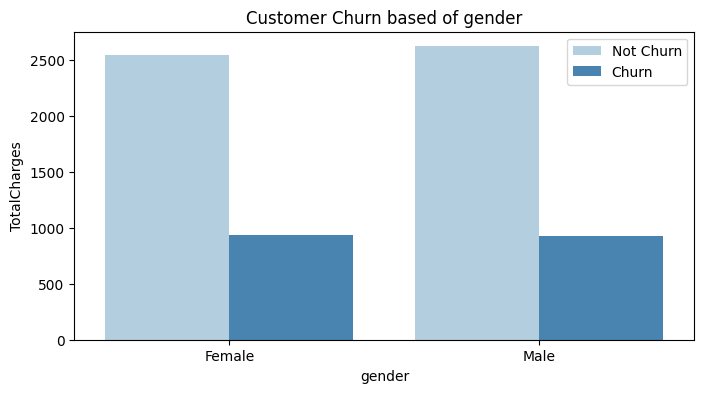

In [44]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='gender',hue='Churn',data=data,palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Customer Churn based of gender")
plt.xlabel('gender')
plt.ylabel('TotalCharges')
plt.legend(['Not Churn','Churn'])
plt.show()

<Figure size 1200x800 with 0 Axes>

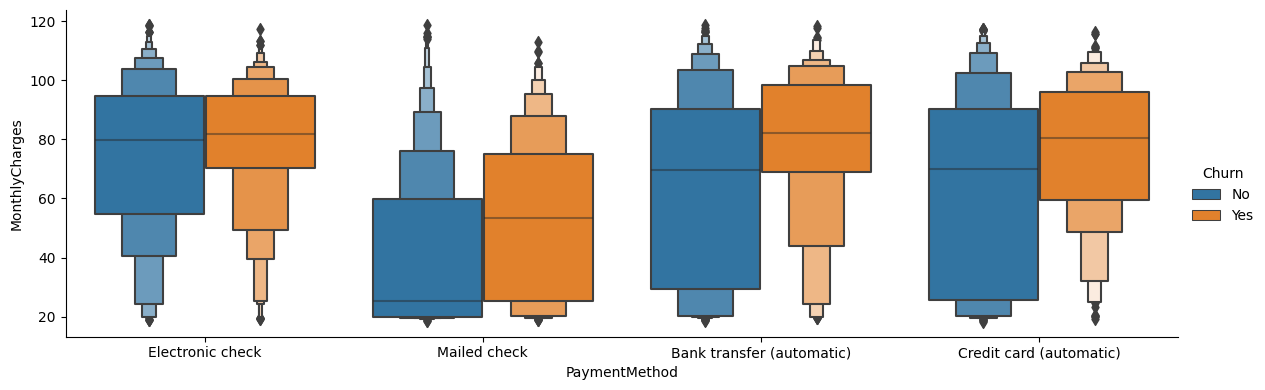

In [45]:
# visualizing the relation between MonthlyCharges and PaymentMethod as per Churn
plt.figure(figsize=(12,8))
sns.catplot(x='PaymentMethod',y='MonthlyCharges',data=data,hue='Churn',kind="boxen",height = 4, aspect = 3)

<Axes: xlabel='Churn', ylabel='count'>

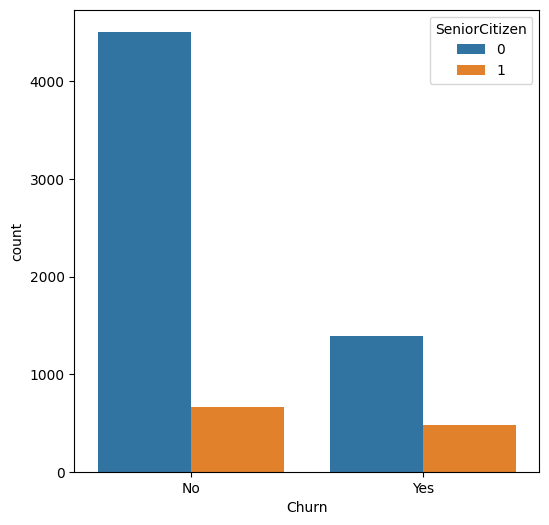

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x='Churn',data=data,hue='SeniorCitizen') # visualizing the churn ration as per SeniorCitizen